<a href="https://colab.research.google.com/github/suryareddy1376/DeepLearning/blob/main/CNN_from_Scratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [43]:
keras.utils.set_random_seed(42)

In [44]:
df = pd.read_csv("http://storage.googleapis.com/download.tensorflow.org/data/heart.csv")

In [45]:
df.shape

(303, 14)

In [46]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,normal,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,normal,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,normal,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,reversible,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,reversible,0


In [47]:
df.target.value_counts(normalize=True,dropna=False)

,proportion
target,
0,0.726073
1,0.273927


In [48]:
categorical_values = ['sex','cp','fbs','restecg','exang','thal','ca']
numeric_values = ['age','trestbps','chol','thalach','oldpeak','slope']

In [49]:
df = pd.get_dummies(df,columns=categorical_values,dtype=int)

In [50]:
df.head()

,age,trestbps,chol,thalach,oldpeak,slope,target,sex_0,sex_1,cp_0,...,exang_1,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible,ca_0,ca_1,ca_2,ca_3
0,63,145,233,150,2.3,3,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,67,160,286,108,1.5,2,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,67,120,229,129,2.6,2,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,37,130,250,187,3.5,3,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,41,130,204,172,1.4,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [51]:
test_df = df.sample(frac=.2,random_state=42)
train_df = df.drop(test_df.index)

## Standardisation

In [52]:
means = train_df[numeric_values].mean()
sd = train_df[numeric_values].std()

In [53]:
train_df[numeric_values]= (train_df[numeric_values]-means)/sd
test_df[numeric_values] = (test_df[numeric_values]-means)/sd

In [54]:
train_df.head()

,age,trestbps,chol,thalach,oldpeak,slope,target,sex_0,sex_1,cp_0,...,exang_1,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible,ca_0,ca_1,ca_2,ca_3
0,0.963746,0.721939,-0.278690,0.008396,1.083461,2.226814,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,1.405254,1.554681,0.814423,-1.807247,0.399542,0.646494,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,1.405254,-0.665964,-0.361189,-0.899426,1.339930,0.646494,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,-1.906055,-0.110803,0.071931,1.607891,2.109339,2.226814,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,-1.464547,-0.110803,-0.876809,0.959447,0.314052,-0.933825,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [55]:
train = train_df.to_numpy(dtype=int)
test = test_df.to_numpy(dtype=int)

In [56]:
train_X = np.delete(train,6,axis=1)
test_X = np.delete(test,6,axis = 1)


In [57]:
train_X.shape
test_X.shape

(61, 29)

In [58]:
train_y = train[:,6]
test_y = test[:,6]

In [59]:
train_y.shape
test_y.shape

(61,)

##Model

In [60]:
num_columns = train_X.shape[1]
input = keras.Input(shape=(num_columns,))
h = keras.layers.Dense(16,activation = "relu",name = "hidden")(input)
output = keras.layers.Dense(1,activation="sigmoid",name="output")(h)
model = keras.Model(input,output)

In [61]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

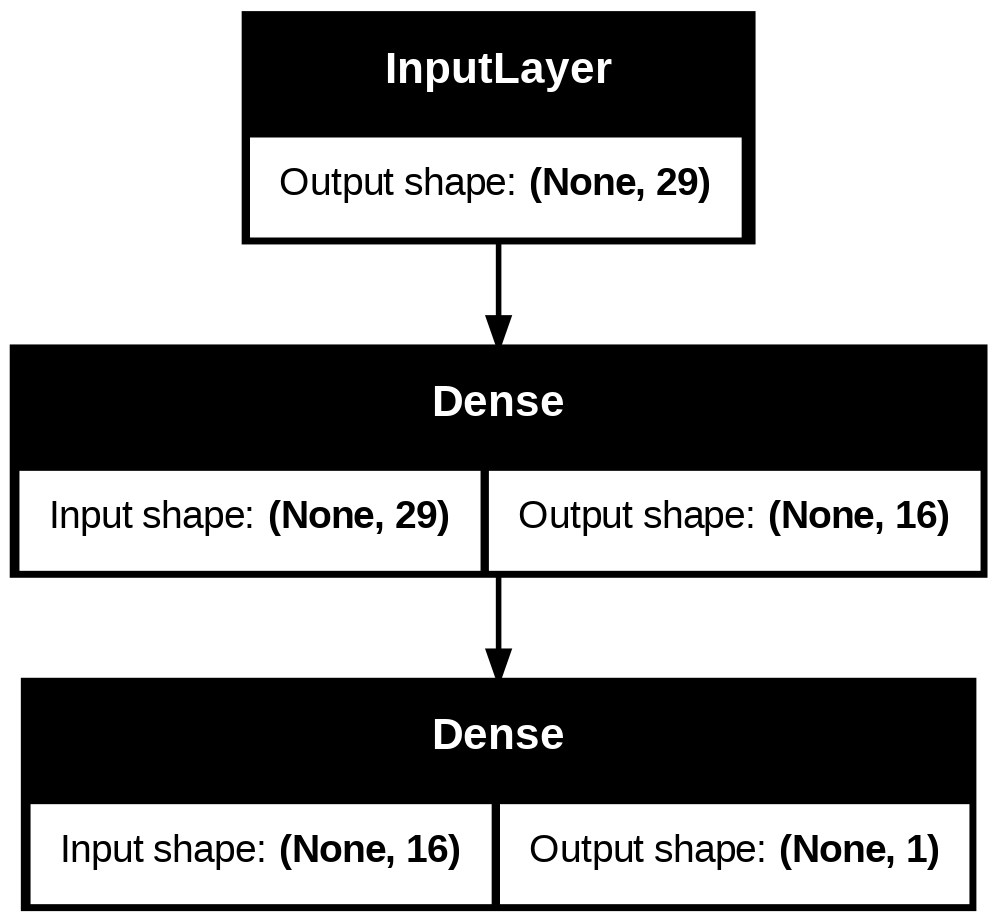

In [62]:
keras.utils.plot_model(model,show_shapes=True)

In [63]:
model.compile(optimizer="adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])



In [64]:
history = model.fit(train_X,
          train_y,
          batch_size = 32,
          epochs = 300,
          verbose = 1,
          validation_split = .2
          )

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5467 - loss: 0.7056 - val_accuracy: 0.5510 - val_loss: 0.6843
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5924 - loss: 0.6791 - val_accuracy: 0.5714 - val_loss: 0.6713
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6754 - loss: 0.6610 - val_accuracy: 0.6531 - val_loss: 0.6583
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6751 - loss: 0.6442 - val_accuracy: 0.6531 - val_loss: 0.6462
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6856 - loss: 0.6284 - val_accuracy: 0.6735 - val_loss: 0.6346
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6972 - loss: 0.6128 - val_accuracy: 0.6735 - val_loss: 0.6234
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7029 - loss: 0.5979 - val_accuracy: 0.7143 - val_loss: 0.6126
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7284 - loss: 0.5837 - val_accuracy: 0.7143 - val_loss: 0

In [65]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

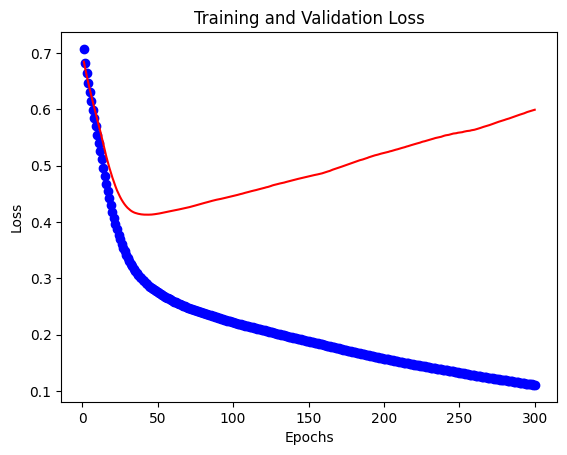

In [66]:
loss_val = history_dict["loss"]
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_val)+1)
plt.plot(epochs,loss_val,"bo",label="Training loss")
plt.plot(epochs,val_loss_values,"r",label  = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

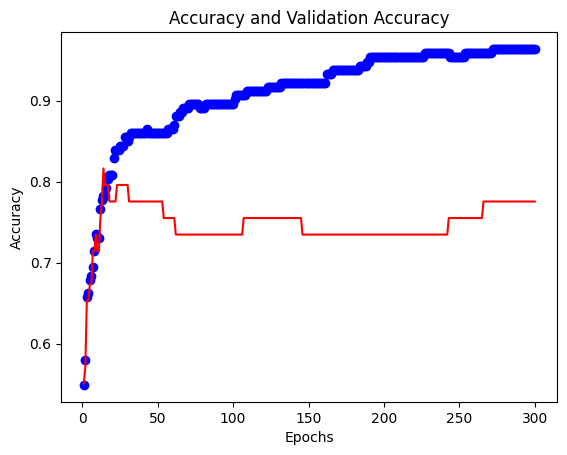

In [67]:
acc = history_dict["accuracy"]
val_acc = history_dict['val_accuracy']
plt.plot(epochs,acc,"bo",label = "Accuracy")
plt.plot(epochs,val_acc,"r",label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy and Validation Accuracy")
plt.show()

In [68]:
model.evaluate(test_X,test_y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7741 - loss: 0.5057


[0.4836876690387726, 0.7704917788505554]